## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [9]:
df = pd.read_csv('../resources/housing.csv')
df = df.dropna()
df.shape
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

y = df.median_house_value
X = df.drop('median_house_value',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# inicializando árvore
rgr1 = DecisionTreeRegressor(random_state=42, max_depth=8)
rgr2 = DecisionTreeRegressor(random_state=42, max_depth=2)

# Treinando modelo
rgr1.fit(X_train, y_train)
rgr2.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

mse_train_rgr1 = mean_squared_error(y_train, rgr1.predict(X_train))
mse_train_rgr2 = mean_squared_error(y_train, rgr2.predict(X_train))

mse_test_rgr1 = mean_squared_error(y_test, rgr1.predict(X_test))
mse_test_rgr2 = mean_squared_error(y_test, rgr2.predict(X_test))

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [10]:
path = rgr2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 7.97000620e+08, 1.65869170e+09, 4.09235809e+09]),
 'impurities': array([6.68882802e+09, 7.48582864e+09, 9.14452035e+09, 1.32368784e+10])}

Text(0, 0.5, 'Impureza total das folhas')

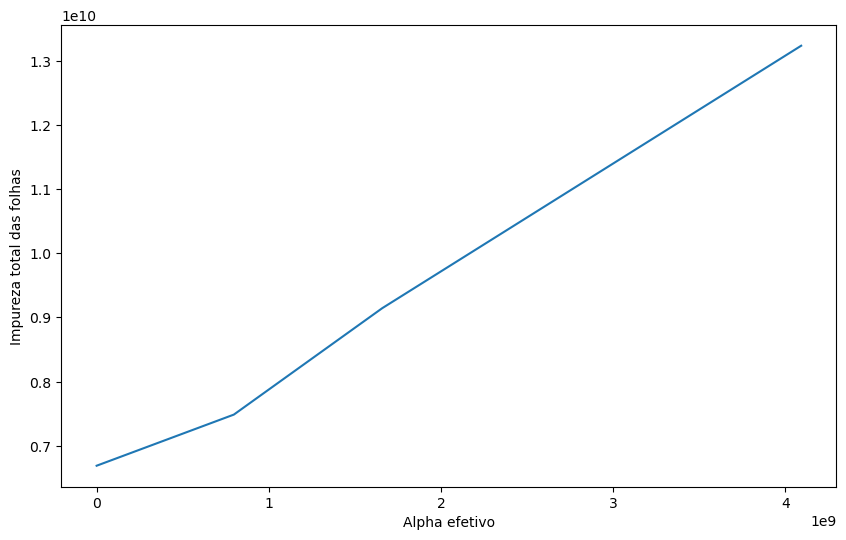

In [13]:
import matplotlib.pyplot as plt

ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

Text(0, 0.5, 'Profundidade da árvore')

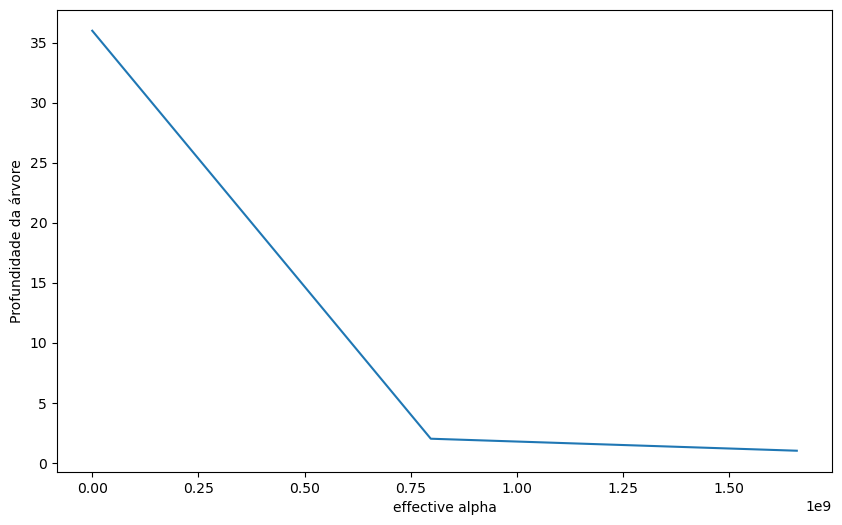

In [15]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [20]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

In [24]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=.5)
arvore_final.fit(X_train, y_train)

print(f"Profundidade:  {arvore_final.tree_.max_depth}")
print(f"MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}")

Profundidade:  36
MSE na base de testes: 4541265329.75


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [23]:
print(f"R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}")

R-quadrado na base de testes: 0.67


### 7. Visualize esta árvore.

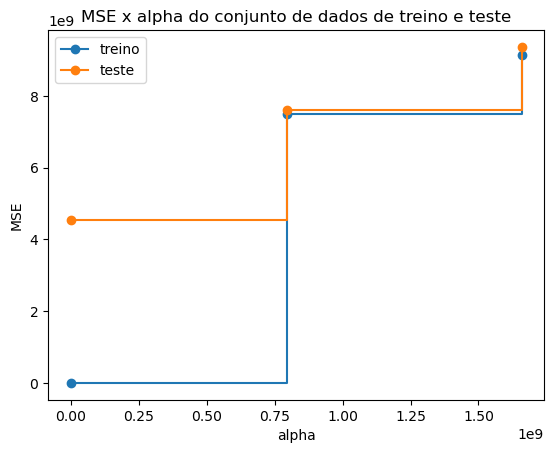

In [25]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()
